In [36]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv("https://raw.githubusercontent.com/anilak1978/customer-churn/master/bigml_59c28831336c6604c800002a.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [21]:
df.shape

(3333, 21)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [12]:
# for loop to see unique values
for column in df.columns.values.tolist():
    print(column)
    print(df[column].unique())
    print("")

state
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']

account length
[128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186 171  28 153 169  13  27   3  42 189 156 134 243 

In [13]:
# feature selection
X = df[["account length", "international plan", "total day charge", "total night charge", "total intl charge", "customer service calls", "state"]]
# target selection
y =df["churn"]
# review feature set
X[0:5]

,account length,international plan,total day charge,total night charge,total intl charge,customer service calls,state
0,128,no,45.07,11.01,2.70,1,KS
1,107,no,27.47,11.45,3.70,1,OH
2,137,no,41.38,7.32,3.29,0,NJ
3,84,yes,50.90,8.86,1.78,2,OH
4,75,yes,28.34,8.41,2.73,3,OK


In [14]:
# update state with one hot coding
X=pd.get_dummies(X, columns=["state"])
# using feature set values 
X=X.values
# preprocess to update str variables to numerical variables
from sklearn import preprocessing
international_plan=preprocessing.LabelEncoder()
international_plan.fit(["no", "yes"])
X[:,1] = international_plan.transform(X[:,1])

In [19]:
X

array([[128, 0, 45.07, ..., 0, 0, 0],
       [107, 0, 27.47, ..., 0, 0, 0],
       [137, 0, 41.38, ..., 0, 0, 0],
       ...,
       [28, 0, 30.74, ..., 0, 0, 0],
       [184, 1, 36.35, ..., 0, 0, 0],
       [74, 0, 39.85, ..., 0, 0, 0]], dtype=object)

In [20]:
# create training and testing set
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=3)

In [22]:
# using random forest classifier and fit the training set
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_trainset, y_trainset)

RandomForestClassifier()

In [23]:
#create prediction using the model
rf_pred = rf_model.predict(X_testset)
rf_pred[0:5]

array([False,  True, False, False, False])

In [24]:
# Looking at the accuracy score (using two methods)
from sklearn import metrics
rf_model.score(X_testset, y_testset)
metrics.accuracy_score(y_testset, rf_pred)

0.9025487256371814

In [25]:
# confusion matrics to find precision and recall
from sklearn.metrics import confusion_matrix
confusion_matrix(y_testset, rf_pred)

array([[557,  16],
       [ 49,  45]], dtype=int64)

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

0.5806451612903226

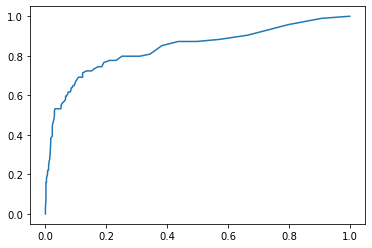

In [27]:
# Looking at the precision score
from sklearn.metrics import precision_score
precision_score(y_testset, rf_pred)

# Looking at the recall score
from sklearn.metrics import recall_score
recall_score(y_testset, rf_pred)

# find probability for each prediction
prob=rf_model.predict_proba(X_testset)[:,1]

# look at ROC curve, which gives us the false and true positive predictions
from sklearn.metrics import roc_curve
fpr, tpr, thresholds=roc_curve(y_testset, prob)
plt.plot(fpr, tpr)

# Looking at the area under the curve
from sklearn.metrics import roc_auc_score
auc=roc_auc_score(y_testset, prob)
auc

#looking at the f1_score
from sklearn.metrics import f1_score
f1_score(y_testset, rf_pred)

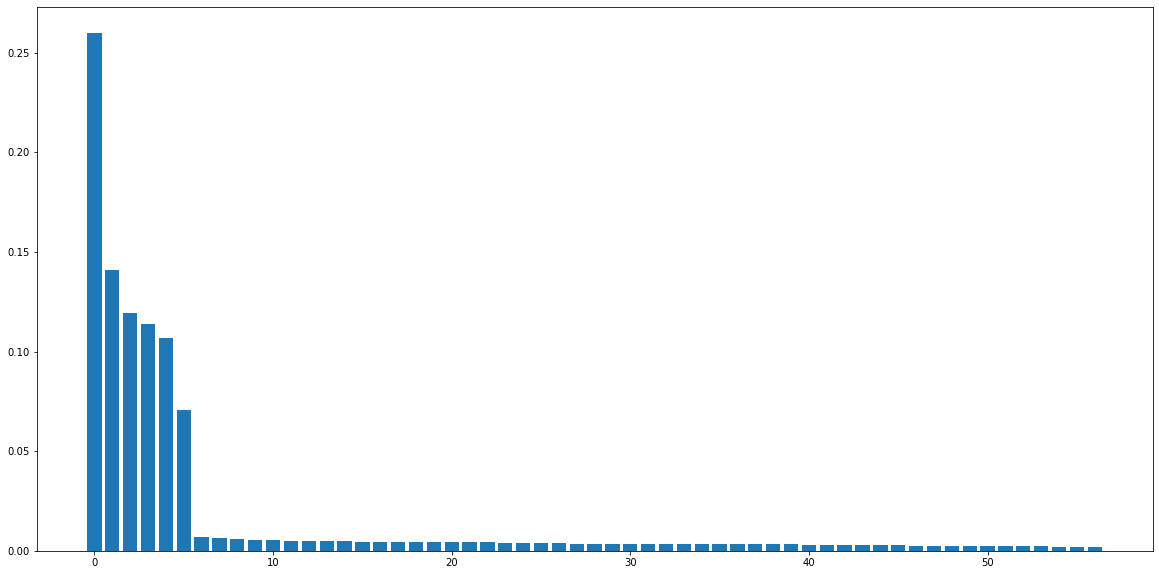

In [28]:
# looking at the importance of each feature
importances=rf_model.feature_importances_

# visualize to see the feature importance
indices=np.argsort(importances)[::-1]
plt.figure(figsize=(20,10))
plt.bar(range(X.shape[1]), importances[indices])
plt.show()


In [29]:
# creating the svm model and fitting training set
# make sure to update probability to True for proabability evaluation
from sklearn.svm import SVC
svc_model=SVC(probability=True)
svc_model.fit(X_trainset, y_trainset)


SVC(probability=True)

In [31]:
# look at the accuracy score
svc_model.score(X_testset, y_testset)

0.8590704647676162

In [32]:
svc_pred=svc_model.predict(X_testset)

In [33]:
# Look at the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_testset, svc_pred)

array([[573,   0],
       [ 94,   0]], dtype=int64)

In [34]:
# look at the accuracy score
svc_model.score(X_testset, y_testset)

0.8590704647676162

In [38]:
from sklearn.model_selection import GridSearchCV

KeyboardInterrupt: 

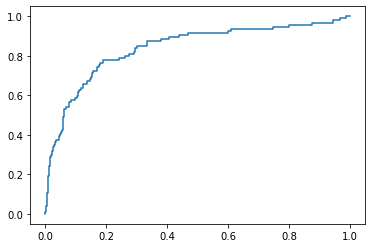

In [39]:
#precision score for svm
precision_score(y_testset, svc_pred)

# recall score for svm
recall_score(y_testset, svc_pred)

# probability for each prediction
prob_2=svc_model.predict_proba(X_testset)[:,1]

# look at ROC curve
fpr, tpr, thresholds=roc_curve(y_testset, prob_2)
plt.plot(fpr, tpr)

# area under the curve
auc=roc_auc_score(y_testset, prob)
auc

# find ideal degree for SVM model
param_grid_2={'degree': np.arange(1,50)}
svc_cv=GridSearchCV(SVC(), param_grid_2)
svc_cv.fit(X,y)
svc_cv.best_params_